2024-02-07 10:46:09.331392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/10
782/782 [==============================] - 23s 28ms/step - loss: 0.4091 - accuracy: 0.7991 - val_loss: 0.3662 - val_accuracy: 0.8390
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 0.1152 - accuracy: 0.9591 - val_loss: 0.4616 - val_accuracy: 0.8296
Epoch 3/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.6244 - val_accuracy: 0.8487
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.7585 - val_accuracy: 0.8452
Epoch 5/10
782/782 [==============================] - 22s 28ms/step - loss: 2.5802e-04 - accuracy: 1.0000 - val_loss: 0.8115 - val_accuracy: 0.8496
Epoch 6/10
782/782 [==============================] - 22s 29ms/step - loss: 4.2524e-05 - accuracy: 1.0000 - val_loss: 0.8401 - val_accuracy: 0.8489
Epoch 7/10
782/782 [==============================] - 23s 30ms/

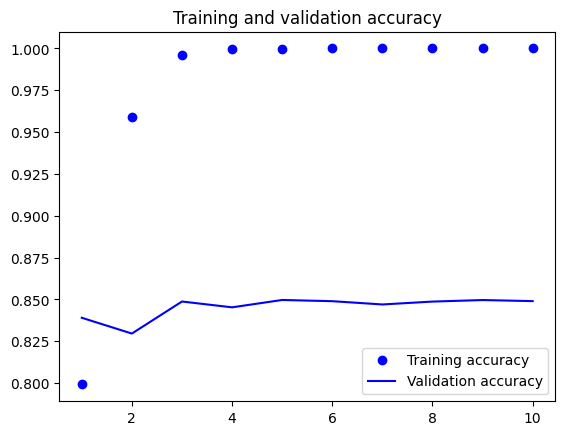

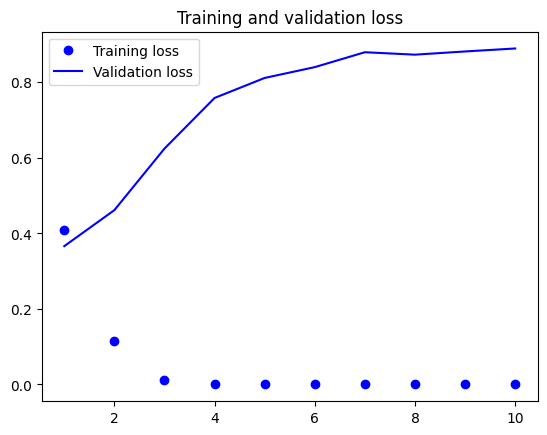

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten
from keras.callbacks import History
from tensorflow.keras.preprocessing.sequence import pad_sequences


# set seed for reproducibility
np.random.seed(42)

# load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# define model architecture
model = Sequential()
model.add(Embedding(10000, 128, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# plot accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)